<a href="https://colab.research.google.com/github/narma-17/YOLO-for-table-detection/blob/main/YOLO_for_Table_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a custom YOLO v4 Model

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Step 1: Loading Datasets

Naming the path to the YOLO v4 folder as YOLOv4

In [3]:
!ln -s /content/gdrive/My\ Drive/YOLO\ v4/ /YOLOv4

Checking the files available in the YOLO v4 Folder

In [4]:
!ls -s /YOLOv4

total 85240
    4  backup	           4  PreTraining         4  SupportScripts
    4  darknet	           1  result.txt      84422  test.zip
    4  Images	           4  RunConfig           4  Training
    4 'License Plate'    291  SDB-page17.jpg      1 'Untitled document.gdoc'
  115  lp_test.jpg       380  SDB-page8.jpg       1 'YOLO v4'


In [5]:
%cd /YOLOv4/darknet

/content/gdrive/My Drive/YOLO v4/darknet


In [6]:
!ls ./data

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


Copying the datasets to the Cloud Virtual Machine Workspace

In [7]:
# copy to cloud folder
!cp /YOLOv4/obj.zip ../
!cp /YOLOv4/test.zip ../

cp: cannot stat '/YOLOv4/obj.zip': No such file or directory
cp: '/YOLOv4/test.zip' and '../test.zip' are the same file


In [ ]:
!ls ./data

9k.tree     eagle.jpg	 imagenet.labels.list	   openimages.names  voc.names
coco9k.map  giraffe.jpg  imagenet.shortnames.list  person.jpg
coco.names  goal.txt	 labels			   scream.jpg
dog.jpg     horses.jpg	 obj			   test


Unzipping the Datasets


In [ ]:
!unzip ../obj.zip -d ./data/obj
!unzip ../test.zip -d ./data/test

Archive:  ../obj.zip
  inflating: ./data/obj/18HHL_100.jpg  
 extracting: ./data/obj/18HHL_100.txt  
  inflating: ./data/obj/18HHL_101.jpg  
  inflating: ./data/obj/18HHL_101.txt  
  inflating: ./data/obj/18HHL_102.jpg  
 extracting: ./data/obj/18HHL_102.txt  
  inflating: ./data/obj/18HHL_103.jpg  
 extracting: ./data/obj/18HHL_103.txt  
  inflating: ./data/obj/18HHL_104.jpg  
  inflating: ./data/obj/18HHL_104.txt  
  inflating: ./data/obj/18HHL_105.jpg  
 extracting: ./data/obj/18HHL_105.txt  
  inflating: ./data/obj/18HHL_106.jpg  
 extracting: ./data/obj/18HHL_106.txt  
  inflating: ./data/obj/18HHL_107.jpg  
 extracting: ./data/obj/18HHL_107.txt  
  inflating: ./data/obj/18HHL_108.jpg  
 extracting: ./data/obj/18HHL_108.txt  
  inflating: ./data/obj/18HHL_109.jpg  
 extracting: ./data/obj/18HHL_109.txt  
  inflating: ./data/obj/18HHL_110.jpg  
 extracting: ./data/obj/18HHL_110.txt  
  inflating: ./data/obj/18HHL_111.jpg  
  inflating: ./data/obj/18HHL_111.txt  
  inflating: ./data

In [ ]:
!ls './data/obj'

 18HHL_100.jpg
 18HHL_100.txt
 18HHL_101.jpg
 18HHL_101.txt
 18HHL_102.jpg
 18HHL_102.txt
 18HHL_103.jpg
 18HHL_103.txt
 18HHL_104.jpg
 18HHL_104.txt
 18HHL_105.jpg
 18HHL_105.txt
 18HHL_106.jpg
 18HHL_106.txt
 18HHL_107.jpg
 18HHL_107.txt
 18HHL_108.jpg
 18HHL_108.txt
 18HHL_109.jpg
 18HHL_109.txt
 18HHL_110.jpg
 18HHL_110.txt
 18HHL_111.jpg
 18HHL_111.txt
 18HHL_112.jpg
 18HHL_112.txt
 18HHL_113.jpg
 18HHL_113.txt
 18HHL_114.jpg
 18HHL_114.txt
 18HHL_115.jpg
 18HHL_115.txt
 18HHL_116.jpg
 18HHL_116.txt
 18HHL_117.jpg
 18HHL_117.txt
 18HHL_118.jpg
 18HHL_118.txt
 18HHL_119.jpg
 18HHL_119.txt
 18HHL_120.jpg
 18HHL_120.txt
 18HHL_121.jpg
 18HHL_121.txt
 18HHL_122.jpg
 18HHL_122.txt
 18HHL_123.jpg
 18HHL_123.txt
 18HHL_124.jpg
 18HHL_124.txt
 18HHL_125.jpg
 18HHL_125.txt
 18HHL_126.jpg
 18HHL_126.txt
 18HHL_127.jpg
 18HHL_127.txt
 18HHL_128.jpg
 18HHL_128.txt
 18HHL_129.jpg
 18HHL_129.txt
 18HHL_130.jpg
 18HHL_130.txt
 18HHL_135.jpg
 18HHL_135.txt
 18HHL_137.jpg
 18HHL_137.txt
 18HHL_138

### Step 2: Configuring Files for Training

In [ ]:
!%cd /YOLOv4/darknet

/bin/bash: line 0: fg: no job control


Copy amended config file to cloud vm working directory

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /YOLOv4/RunConfig/yolov4-obj.cfg ./cfg

Copy the uploaded obj.names and obj.data files to cloud vm working directory

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /YOLOv4/RunConfig/obj.names ./data
!cp /YOLOv4/RunConfig/obj.data  ./data

In [ ]:
!ls ./data

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     test
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


Generate the text file with the file path to the train and test images

In [ ]:
!cp /YOLOv4/SupportScripts/generate_train.py ./
!cp /YOLOv4/SupportScripts/generate_test.py ./

In [ ]:
!python generate_train.py
!python generate_test.py

### Step 3: Training Data

In [ ]:
!ls /YOLOv4/darknet/data

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


In [ ]:
%cd /YOLOv4/darknet

/content/gdrive/My Drive/YOLO v4/darknet


In [ ]:
!chmod +x darknet

In [ ]:
!./darknet detector train /YOLOv4/darknet/data/obj.data /YOLOv4/darknet/cfg/yolov4-obj1.cfg /YOLOv4/backup/yolov4-obj1_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 28585, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.25, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000003, iou_loss = 0.000000, total_loss = 0.000003 
v3 (iou loss, Normalizer: (iou: 0.25, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.000000), count: 1, class_loss = 0.129018, iou_loss = 0.000000, total_loss = 0.129018 
v3 (iou loss, Normalizer: (iou: 0.25, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.973529), count: 3, class_loss = 0.165908, iou_loss = 7.702612, total_loss = 7.868520 
 total_bbox = 28588, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.25, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000220, iou_loss = 0.000000, total_loss = 0.000220 
v3 (iou loss, Normalizer: (iou: 0.25, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.923779), count: 6, class_loss = 0.260401, iou_loss = 112.366341, total_loss = 112.626740 


### Evaluating the Model

#### Calculating mAP for the test set

In [ ]:
!./darknet detector map /YOLOv4/darknet/data/obj.data /YOLOv4/darknet/cfg/yolov4-obj.cfg /YOLOv4/backup/yolov4-obj1_best.weights 

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

#### Testing on an image

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
%cd /YOLOv4/darknet

/content/gdrive/My Drive/YOLO v4/darknet


In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/gdrive/My Drive/YOLO v4/darknet/cfg
/content/gdrive/My Drive/YOLO v4/darknet


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test /YOLOv4/darknet/data/obj.data /YOLOv4/darknet/cfg/yolov4-obj3.cfg /YOLOv4/backup/yolov4-obj1_last.weights /YOLOv4/darknet/data/test/Tokyo_Cement-page37.jpg -thresh 0.25


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

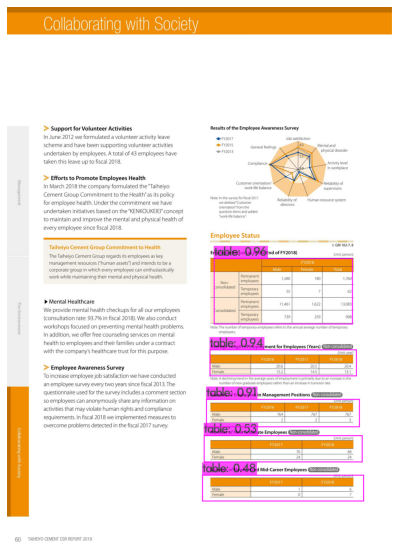

In [ ]:
imShow('predictions.jpg')

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test /YOLOv4/darknet/data/obj.data /YOLOv4/darknet/cfg/yolov4-obj.cfg /YOLOv4/backup/yolov4-obj_best.weights /data/test.txt > /YOLOv4/result.txt -thresh 0.5